# Why Neural Networks?
what you can do, and why everybody are so enthusiast


<h4 style="text-align: right"> Fabio Fumarola</h4>

# Outline

- Why there is so much confusion about Artificial Intelligence?
- Artificial Intelligence, Machine Learning and Deep Learning
- Neural Networks architectures:
    - Linear 
    - Convolutional
    - Recurrent
- The general concept of *Learning Representations*
- Conclusion

# Evidence 1: Work

<img width="30%" height="30%" src="./imgs/what_is_ai.png"></img>

# Evidence 2: Elon Musk Warns

*"With AI ... We're summoning the Demon'*

<img width="60%" height="60%" src="./imgs/musk.jpg"></img>


# Evidence 3: News Papers

<img width="50%" height="50%" src="./imgs/evidence3.png"></img>

# Goal of this presentation

<img height="80%" width="80%" src="./imgs/separate.png"></img>

- let be clear about what AI can and cannot do

# Terminator

*"If you're worried about the Terminator, just keep the door closed"* - Rodney Brooks

<img width="60%" height="60%"  src="https://media.giphy.com/media/ANkW9pXQ8GStO/giphy.gif"></img>

# Terminator Thief???

<img width="70%" height="70%"  src="https://media.giphy.com/media/wyyeKYzaAvNXG/giphy.gif"></img>

# Artificial Intelligence, Machine Learning and Deep Learning

<table>
    <tr>
        <td><img src="./imgs/aimldl.png"></img></td>
        <td><img src="./imgs/image1.png"></img></td>
    </tr>
</table>

# How we define Artificial Intelligence

- Theory: AI is machines doing what humans do **(AGI)**
    - Gave rise to a lot of Hollywood scripts
    - AI as noun: "the AI" took over the world
    
- AI in practice **(ANI)**:
    - narrow tasks once used to require human intelligence (speech recognition, play go, driving)

# Example of Artifical Narrow Intelligence: Alpha Go

- GO is a game, with a board, discrete states, and evaluate function
- **DeepMind** beated the best human player
- Alpha GO can play also if the room is on fire (is not aware of the real world)

# Machine Learning: AI Success

<img src="./imgs/machine_learning.png"></img>

# Learning Representations from data

- Given: **1. input data points**, **2. labels for the input points** and a **3. why to measure if the algorithm is doing a good job**
- the algorithm learns **meaningful representations** by searching in the **Search Space**

<img height="80%" width="80%" src="./imgs/learning_representations.png"></img>

# Deep Learning and Neural Networks

- The deep isn’t a reference to any deeper understanding, 
- But with the idea of learning successive layers of representations.
- This is the awesome part of neural networks **(spend some words about)**

<img height="50%" width="50%" src="./imgs/network1.png"></img>





# Deep Learning and Neural Networks

*layered representations learning* and *hierarchical representations learning*

<img height="50%" width="50%" src="./imgs/network2.png"></img>

# Neural Network Workflow

<img height="50%" width="50%" src="./imgs/neural_network.png"></img>

# First Example: MNIST


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import utils

tf.logging.set_verbosity(tf.logging.INFO)

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print('shape training images ', train_images.shape)
print('shape test images ', test_images.shape)

num_classes = 10

/home/fabio/miniconda3/envs/dl/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


shape training images  (60000, 28, 28)
shape test images  (10000, 28, 28)


displaying image 32200 with class 5


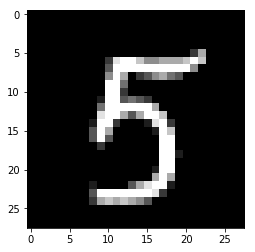

In [2]:
i = np.random.randint(0, len(train_images))
print('displaying image {} with class {}'.format(i, train_labels[i]))
plt.imshow(train_images[i], cmap='gray');

# Define Inputs

In [3]:
g = tf.Graph()

flatten_shape = np.prod(train_images.shape[1:])

with g.as_default():
    X = tf.placeholder(tf.float32, [None, flatten_shape], name='X')
    y = tf.placeholder(tf.float32, [None, 10], name='y')
    
#utils.show_graph(g)

# Define the Dense Layer

In [4]:
def dense(input_tensor, output_units, scope, activation=None):
    with tf.name_scope(scope):
        #shape of the weights matrix
        shape = (input_tensor.shape.as_list()[1], output_units)
        # weights matrix
        weights = tf.Variable(tf.truncated_normal(shape=shape, dtype=tf.float32), name='W')
        # bias vector (**brodcast**)
        bias = tf.Variable(tf.zeros(shape=[output_units], dtype=tf.float32), name='b')
        # define the layers as W * x + b
        layer = tf.add(tf.matmul(input_tensor, weights), bias)
        # add the squashing function (non linearity)
        if activation is not None:
            return activation(layer)
        else:
            return layer

# Let us build the Model

In [5]:
with g.as_default():
    # define the model
    l1 = dense(X, 32, 'h1', activation=tf.nn.sigmoid)
    l2 = dense(l1, 64, 'h2', activation=tf.nn.relu)
    logits = dense(l1, 10, 'out', activation=None)

    # define the loss function
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=y))

    # define the optimizer
    optmizer = tf.train.RMSPropOptimizer(learning_rate=0.01)

    #train operation
    train_op = optmizer.minimize(loss_op)
    
    #metrics
    correct_pred = tf.equal(tf.argmax(logits, axis=1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [6]:
utils.show_graph(g)

# Train the Model

## Data Preprocessing

In [7]:
epochs = 10
batch_size = 128
val_step = int(len(train_images) * 0.9)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#reshape the images
train_images_reshaped = np.reshape(train_images, (len(train_images), -1))
test_images_reshaped = np.reshape(test_images, [len(test_images), -1])

print('shape train images {}'.format(train_images_reshaped.shape))


def one_hot(labels, num_classes):
    results = np.zeros(shape=(len(labels), num_classes), dtype=np.float32)
    for i, values in enumerate(labels):
        results[i,values] = 1.
    return  results

train_labels_one_hot = one_hot(train_labels, 10)
test_labels_one_hot = one_hot(test_labels, 10)
print('shape train labels with one hot econding {}'.format(train_labels_one_hot.shape))

shape train images (60000, 784)
shape train labels with one hot econding (60000, 10)


## Train, Val and mini-batches

In [8]:
train_x, val_x = train_images_reshaped[:val_step], train_images_reshaped[val_step:]
train_y, val_y = train_labels_one_hot[:val_step], train_labels_one_hot[val_step:]

num_batches = len(train_x) // batch_size


def to_batch(x,y, batch_size, shuffle=True):
    idxs = np.arange(0, len(x))
    np.random.shuffle(idxs)
    x = x[idxs]
    y = y[idxs]
    num_batches = len(x) // batch_size
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        if  end < len(x):
            yield x[start:end], y[start:end]
        else:
            yield x[start:], y[start:]

## Train the Model

In [9]:
with tf.Session(graph=g) as sess:
    # initialize variables (i.e. assign to their default value)
    sess.run(tf.global_variables_initializer())
    
    for e in range(1, epochs + 1):
        gen = to_batch(train_x, train_y, batch_size)
        for _ in range(num_batches):
            x_batch, y_batch = next(gen)
            sess.run(train_op, feed_dict={X: x_batch, y: y_batch})
        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: val_x, y: val_y})
        print("Epochs {}, val_loss={:.3f}, val_acc={:.3f}".format(e, loss, acc))
    
    print('training finished')
    
    test_acc = sess.run(accuracy, feed_dict={X: test_images_reshaped, y: test_labels_one_hot})
    print('Testing accuracy {}'.format(test_acc))
    
    saver = tf.train.Saver()
    save_path = saver.save(sess, '/tmp/model.ckpt')
    print('model saved in path {}'.format(save_path))

Epochs 1, val_loss=0.248, val_acc=0.923
Epochs 2, val_loss=0.196, val_acc=0.942
Epochs 3, val_loss=0.171, val_acc=0.951
Epochs 4, val_loss=0.157, val_acc=0.956
Epochs 5, val_loss=0.152, val_acc=0.955
Epochs 6, val_loss=0.138, val_acc=0.960
Epochs 7, val_loss=0.143, val_acc=0.961
Epochs 8, val_loss=0.136, val_acc=0.965
Epochs 9, val_loss=0.132, val_acc=0.963
Epochs 10, val_loss=0.128, val_acc=0.965
training finished
Testing accuracy 0.9564999938011169
model saved in path /tmp/model.ckpt


## Use the Model

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
class predicted 7, expected 7


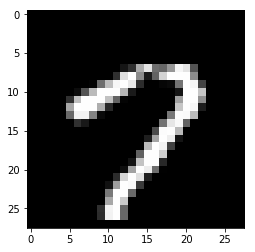

In [10]:
with tf.Session(graph=g) as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    i = np.random.randint(0, len(test_images))
    res = np.argmax(sess.run(logits, feed_dict={X: [test_images_reshaped[i]]}))
    print('class predicted {}, expected {}'.format(res, test_labels[i]))
    plt.imshow(test_images[i], cmap='gray')
    

# Concept Learned

- computation graph
- what is a layer
- how to plug non-linearity
- loss function
- optimizer
- how to train a neural network

# Introduction to Convolutional Neural Networks


- Different from fully connected
- Extract features from small patches, extracting local features

<table>
    <tr>
        <td><img src="./imgs/patch.png"></img></td>
        <td><img src="./imgs/features.png"></img></td>
    </tr>
</table>


# Features and Convolution

- compose these features to learn a hiearchical representation of the input
<table>
    <tr>
        <td><img src="./imgs/convnet.png"></img></td>
        <td><img src="./imgs/conv_op.gif"></img></td>
    </tr>
</table>

# MNIST Reloaded

## Model

In [11]:
input_l = tf.keras.Input((28,28, 1))
conv_1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_l)
maxpool_1 = tf.keras.layers.MaxPooling2D((2,2))(conv_1)
conv_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(maxpool_1)
maxpool_2 = tf.keras.layers.MaxPooling2D((2,2))(conv_2)
conv_3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(maxpool_2)
flatten = tf.keras.layers.Flatten()(conv_3)
dense_1 = tf.keras.layers.Dense(64, activation='relu')(flatten)
dense_2 = tf.keras.layers.Dense(10, activation='softmax')(dense_1)

model = tf.keras.Model(inputs=[input_l], outputs=[dense_2])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

## Compile and Fit

In [13]:
train_images_reshaped = train_images.reshape((-1, 28, 28, 1))
test_images_reshaped = test_images.reshape((-1, 28, 28, 1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_images_reshaped, train_labels_one_hot, validation_split=0.1, epochs=5, batch_size=64);

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 93us/step - loss: 0.1791 - acc: 0.9435 - val_loss: 0.0619 - val_acc: 0.9827
Epoch 2/5
54000/54000 [==============================] - 4s 73us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0408 - val_acc: 0.9883
Epoch 3/5
54000/54000 [==============================] - 4s 73us/step - loss: 0.0346 - acc: 0.9890 - val_loss: 0.0364 - val_acc: 0.9887
Epoch 4/5
54000/54000 [==============================] - 4s 73us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0314 - val_acc: 0.9910
Epoch 5/5
54000/54000 [==============================] - 4s 73us/step - loss: 0.0211 - acc: 0.9933 - val_loss: 0.0302 - val_acc: 0.9912


## Plot Metrics

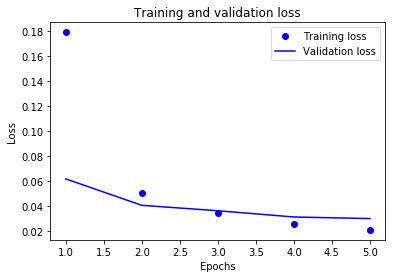

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluate on Test

In [15]:
test_loss, test_acc = model.evaluate(test_images_reshaped, test_labels_one_hot)
print('test loss={}, accuracy={}'.format(test_loss, test_acc))

10000/10000 [==============================] - 0s 45us/step
test loss=0.026466482408493176, accuracy=0.9923


# What we don't cover

- using data augmentetation
- using pretained convnets
- fine tuning
- visualizing convnets filters and activation

# From feed-forward to RNNs

- language model
- image captioning
- sentiment, classification
- machine translation
- video classification on frame level

<img src="./imgs/rnn_types.jpeg"></img>

## Long Short Term Memory

- **forget gate**: whether to erase cell
- **input gate**: whether to write to cell
- **gate gate**: how much to write to cell
- **output gate**: how much to reveal cell


<table>
    <tr>
        <td><img src="./imgs/lstm_detail.jpeg"></img></td>
        <td><img src="./imgs/lstm.png"></img></td>
    </tr>
</table>

## Character-level Language Model

<img src="./imgs/charseq.jpeg"></img>

## Review Dataset

In [16]:
with open('./data/train.csv','r') as f:
    reviews = f.readlines()

reviews = [r.lower() for r in reviews]

max_review = np.max([len(x) for x in reviews])
min_review = np.min([len(x) for x in reviews])
print('max sentence length {}'.format(max_review))
print('min sentence length {}'.format(min_review))

# 
print('num of reviews =', len(reviews))
reviews = [s for s in reviews if  200 >= len(s) >= 100]
print('num of reviews len [100:200] =', len(reviews))

max sentence length 4112
min sentence length 1
num of reviews = 67633
num of reviews len [100:200] = 17577


In [17]:
import gc
gc.collect()

12533

In [18]:
# text = ' '.join(reviews[:8000])
num_reviews = 2000

# Length of extracted character sequences# Length 
maxlen = 60

# We sample a new sequence every `step` characters
step = 1

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for review in reviews[:num_reviews]:
    for i in range(0, len(review) - maxlen, step):
        sentences.append(review[i: i + maxlen])
        next_chars.append(review[i + maxlen])
print('Number of sequences:', len(sentences))


# List of unique characters in the corpus
chars = sorted(list(set( ' '.join(reviews[:num_reviews]))))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 172507
Unique characters: 110
Vectorization...


## Building the Model

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, activation='tanh',
                               input_shape=(maxlen, len(chars))))
model.add(tf.keras.layers.Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               375808    
_________________________________________________________________
dense_3 (Dense)              (None, 110)               28270     
Total params: 404,078
Trainable params: 404,078
Non-trainable params: 0
_________________________________________________________________


In [20]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [23]:
import random
import sys

for e in range(1, 21):
    print('epoch', e)
    model.fit(x,y, batch_size=512, epochs=1)
    
    # Select a text seed at random
    # i = random.randint(0, 6000)
    #select the same review each time
    if e % 2 == 0:
        generated_text = reviews[1000][0: 0 + maxlen]
        print('--- Generating with seed: "' + generated_text + '"')

        for temperature in [0.2, 0.5, 1.0]:
                print('------ temperature:', temperature)
                sys.stdout.write('SEED: ')
                sys.stdout.write(generated_text)

                # We generate 400 characters
                for i in range(100):
                    sampled = np.zeros((1, maxlen, len(chars)))
                    for t, char in enumerate(generated_text):
                        sampled[0, t, char_indices[char]] = 1.

                    preds = model.predict(sampled, verbose=0)[0]
                    next_index = sample(preds, temperature)
                    next_char = chars[next_index]

                    generated_text += next_char
                    generated_text = generated_text[1:]

                    sys.stdout.write(next_char)
                    sys.stdout.flush()
                print()    

epoch 1
Epoch 1/1
172507/172507 [==============================] - 39s 227us/step - loss: 2.7159
epoch 2
Epoch 1/1
172507/172507 [==============================] - 39s 228us/step - loss: 2.3677
--- Generating with seed: "tra tante trappole per turisti della zona, questo posto segn"
------ temperature: 0.2
tra tante trappole per turisti della zona, questo posto segni e la so por con con per a che li conti sa si conto da son con al per a che che per con ca con con 
------ temperature: 0.5
 sa si conto da son con al per a che che per con ca con con bal sana sol i me di parsa di putto mol persina de can pi son a parpare de se da pirto si can un man
------ temperature: 1.0
persina de can pi son a parpare de se da pirto si can un maniamantibi e bin e9n am/ le simi,)
che 
ll è da regla de pirne sin ol casmolt".. d.
praza comvitti vo
epoch 3
Epoch 1/1
172507/172507 [==============================] - 39s 229us/step - loss: 2.1944
epoch 4
Epoch 1/1
172507/172507 [==============================] 

iglio e cortesia e il personale è molto cortese. personale gentile e tranquilli. consiglio gentile. il compo di menù di più di un pare di ora con ma servizio e 
------ temperature: 1.0
il compo di menù di più di un pare di ora con ma servizio e un prezzo è issimutto da voole 40, miglio abbandante, ricendere apporto se ca.atera peccerazione
:)



# Other Interesting Topics

- use language models, and autoencoder as **pretraining**
- use autoencoder for anomaly detection
- sequence to sequencec with attention 
- siamese network for one-shot learning
- unsupervised sentiment classification with sentiment neuron
- Generative Adversarial Networks
